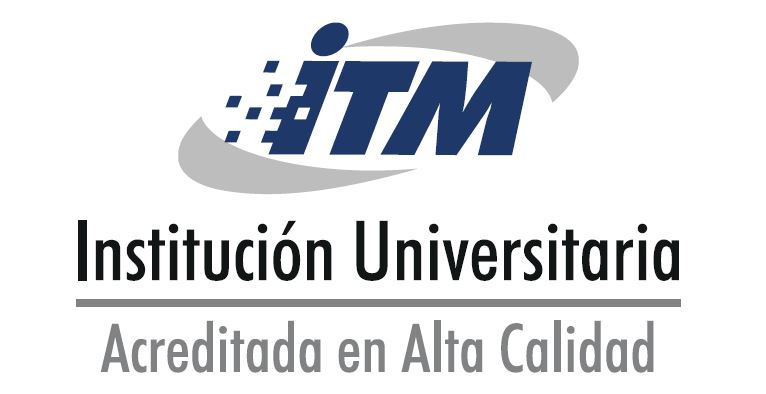

<h2>Inteligencia Artificial - IAI84</h2>

<h3>Instituto Tecnológico Metropolitano</h3>
Pedro Atencio Ortiz - 2018
<br>

<h3>Trabajo No. 2</h3>
<h4>Sobre: Algoritmos Genéticos</h4>
<br>
<h5><strong>Condiciones</strong>:</h5>
<br>
<strong>Integrantes</strong>: 2 personas máximo.
<br>
<strong>Forma de entrega</strong>: via correo electrónico a pedroatencio@itm.edu.co
<br>
<strong>Formato de entrega</strong>: jupyter notebook.
<br>
<strong>Fecha de asignación</strong>: 07 - Septiembre - 2018
<br>
<strong>Fecha de entrega</strong>: 15 - Septiembre - 2018
<br>
<br>
<strong>Descripción</strong>:
<br>
<br>
Elaborar los siguientes puntos. En cada caso se requiere entregue documentación (escrita y visual) de los experimentos realizados.
<br>
<br>
1. Implementar los problemas planteados en el archivo PDF "Taller en clase" que se encuentra dentro de la carpeta "Material complementario"->"Algoritmos geneticos". Para este punto modifique el codigo entregado en clase para que se adapte a los problemas del taller.
<br>
2. Implementar el método de selección por RULETA.
<br>
3. Aplicar el método de selección por RULETA para todos los problemas del taller y evaluar respecto a la implementación del punto 1 respecto a los siguientes criterios: 3.1. Convergencia: ¿En promedio, utilizando RULETA se disminuye o aumenta el número de epocas necesarias para que el algoritmo se estabilice? 3.2. Efectividad: ¿En promedio, RULETA permite obtener la mejor solución de forma repetida?

<h2>Solución</h2>
<br>
<br>
<strong>Integrantes</strong>
<br>
<strong>Fabio Nelson Osorio</strong>
<br>
<br>
<br>
<strong><h3>Punto 1<h3></strong>

In [91]:
#inicia pidiendo losdatos para inicializar los parametros para realizar el algoritmo

ag=[]
cg=[]
global ni
global nc
global ng
global pc
global pm
global b # load limit constraint

def agregar():
    globals().update({"ni":int(input("Ingrese numero de iteraciones :"))})
    globals().update({"nc":int(input("Ingrese tamaño de la poblacion : "))})
    globals().update({"pc":float(input("Ingrese probabilidad de cruce : "))})
    globals().update({"pm":float(input("Ingrese probabilidad de mutacion : "))})
    globals().update({"b":int(input("Ingrese Limite: "))})
    can=int(input("Ingrese tamaño de arreglo : "))
    globals().update({"ng":can})
    for x in range(can):
        ag_element=int(input("elemento para el tamaño del array en la posicion : "+str(x+1)+": "))
        ag.append(ag_element)
    for x in range(can):
        cg_element=int(input("beneficio del arreglo en la pocicion: "+str(x+1)+": "))
        cg.append(cg_element)
        
agregar()

Ingrese numero de iteraciones :100
Ingrese tamaño de la poblacion : 10
Ingrese probabilidad de cruce : 0.9
Ingrese probabilidad de mutacion : 0.5
Ingrese Limite: 16
Ingrese tamaño de arreglo : 4
elemento para el tamaño del array en la posicion : 1: 3
elemento para el tamaño del array en la posicion : 2: 5
elemento para el tamaño del array en la posicion : 3: 9
elemento para el tamaño del array en la posicion : 4: 5
beneficio del arreglo en la pocicion: 1: 45
beneficio del arreglo en la pocicion: 2: 30
beneficio del arreglo en la pocicion: 3: 45
beneficio del arreglo en la pocicion: 4: 10


In [92]:

# Funcion de aptitud
import numpy as np
def evalbin(x):
    a=np.array(ag) #element size array
    c=np.array(cg) #element benefit array
    #b=44 #load limit (constraint)
    
    #1 - include element, 0 - not include element

    #if array x does not satisfy size constraint
    if (np.sum(a*x) > b):
        val=0
    else: #if it does
        val=np.sum(c*x)
    
    return val


# Se Inicailizan parametros del algoritmo

#ni = 100 #numero de iteraciones
#nc = 10 #tamaño de la poblacion
#ng = 7 #numero de genes por cromosoma

#pc = 0.9 #probabilidad de cruce
#pm = 0.5 #probabilidad de mutacion


# Se inicailiza la poblacion (p) y se calcula la aptitud

seed = 2
np.random.seed(seed)

#utilice np.random.random y np.round para generar la matriz de binarios p.
#COMPLETAR
p = np.zeros([nc, ng])


#fa es un vector que almacenará las funciones de aptitud de cada individuo de la población.
fa = np.zeros([nc], dtype=np.int)

for i in range(nc):
    fa[i] = evalbin(p[i,:])
    
    
    
#Cilco principal del algoritmo

for i in range(ni):
    #Seleccion - Aleatoria
    p1 = np.random.randint(nc-1)
    p2 = np.random.randint(nc-1)
    
    #Cruce a un punto
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = np.append(p[p1, 0:cross_point], p[p2, cross_point:])
        child2 = np.append(p[p2, 0:cross_point], p[p1, cross_point:])
        
    #Mutacion: se muta un bit aleatoriamente
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
        
        child1[mut_point_c1] = 1-child1[mut_point_c1]
        child2[mut_point_c2] = 1-child2[mut_point_c2]
    
    #Se evaluan los nuevos hijos
    eval_child1 = evalbin(child1)
    eval_child2 = evalbin(child2)
    
    #Insercion por reemplazo de los padres.
    if(eval_child1 > fa[p1]):
        p[p1] = child1
        fa[p1] = eval_child1
    
    if(eval_child2 > fa[p2]):
        p[p2] = child2
        fa[p2] = eval_child2
        
# se imprime la mejor solución

print ('La mejor configuración para la bolsa es: ', p[np.argmax(fa)])
print ('Con una función de aptitud de: ', fa[np.argmax(fa)])

La mejor configuración para la bolsa es:  [1. 0. 1. 0.]
Con una función de aptitud de:  90


<strong><h3>Punto 2</h3></strong>

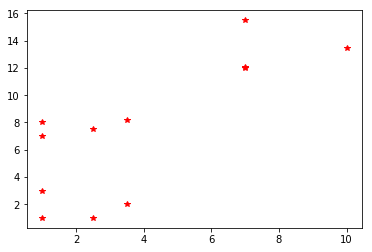

In [71]:
'''
plot problem
'''

%matplotlib inline

import matplotlib.pyplot as plt

x=np.array([1, 1, 1, 1, 2.5, 2.5, 3.5, 3.5, 7.0, 10.0, 7.0, 7.0]) #cities x coordinate
y=np.array([1, 3, 7, 8, 7.5, 1.0, 2.0, 8.2, 15.5, 13.5, 12.1, 12]) #cities y coordinate

plt.plot(x, y, 'r*')#cities

In [82]:
#funcion de aptitud
'''
Program: Genetic Algorithm integer cromosome evaluation function
         for travel salesman problem.
Author: Pedro Atencio
Copyright 2017
'''
import numpy as np

def funcion_aptitud(c):
    x=np.array([1, 1, 1, 1, 2.5, 2.5, 3.5, 3.5, 7.0, 10.0, 7.0, 7.0]) #cities x coordinate
    y=np.array([1, 3, 7, 8, 7.5, 1.0, 2.0, 8.2, 15.5, 13.5, 12.1, 12]) #cities y coordinate
    
    #close loop between cities
    c = np.append(c,c[0])
    
    dist_sum = 0 #sum of distances of path
    
    for i in range(len(x)):
        #cities index
        tx1 = x[c[i]]
        tx2 = x[c[i+1]]
        ty1 = y[c[i]]
        ty2 = y[c[i+1]]
        
        #linear distance between 2 adyacent cities
        dist_sum += np.sqrt( (tx1-tx2)**2 + (ty1-ty2)**2 )
    return (1.0/dist_sum)
    

In [83]:
cromosoma = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
print (funcion_aptitud(cromosoma))

0.01986604931455571


In [84]:
#inicializacion de parametros

ni = 1000 #number of iterations
nc = 100 #number of individuals
ng = 12 #number of genes == cities

pc = 0.9
pm = 0.5

#plot variable
plot_max_fa = np.zeros([ni])
#print (plot_max_fa)

In [85]:
#inicializa poblacion y calcula aptitud

fa = np.zeros([nc], dtype=np.float)
p = np.zeros([nc, ng], dtype=np.int)
#population initialization and aptitude function calculated
for i in range(nc):
    p[i, :] = np.random.permutation(ng) 
    fa[i] = funcion_aptitud(p[i])

In [86]:
for i in range(ni):
    #selection - best selection (parent1)
    p1_index = np.argsort(fa)[::-1][0]
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #cross: permutation one point
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = p1[0:cross_point]
        child2 = p2[0:cross_point]
        
        init_k = cross_point
        for k in range(ng):
            j = (init_k+k)%ng
            if not(np.count_nonzero(child1 == p2[j])):
                child1 = np.append(child1, p2[j])
            
            if not(np.count_nonzero(child2 == p1[j])):
                child2 = np.append(child2, p1[j])

    #mutation: order change
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
    
        temp = child1[mut_point_c1]
        child1[mut_point_c1] = child1[mut_point_c2]
        child1[mut_point_c2] = temp
        
        temp = child2[mut_point_c1]
        child2[mut_point_c1] = child2[mut_point_c2]
        child2[mut_point_c2] = temp
    
    #evaluation
    eval_child1 = funcion_aptitud(child1)
    eval_child2 = funcion_aptitud(child2)
    
    #insertion - max
    if(eval_child1 > fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 > fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2
    
    plot_max_fa[i] = fa[np.argmax(fa)]

In [87]:
print ('La mejor ruta es: ', p[np.argmax(fa)])
print ('Con una función de aptitud de: ', fa[np.argmax(fa)])

La mejor ruta es:  [ 1  0  5  6 11 10  9  8  7  4  3  2]
Con una función de aptitud de:  0.026026324547987843


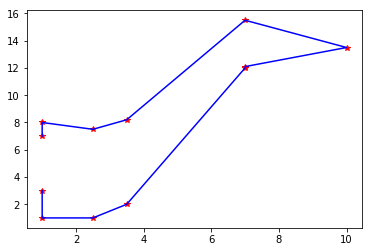

In [88]:
'''
plot solution
'''
best_path = p[np.argmax(fa)]
plt.plot(x, y, 'r*')#paths
plt.plot(x[best_path], y[best_path], 'b')#paths
plt.show()